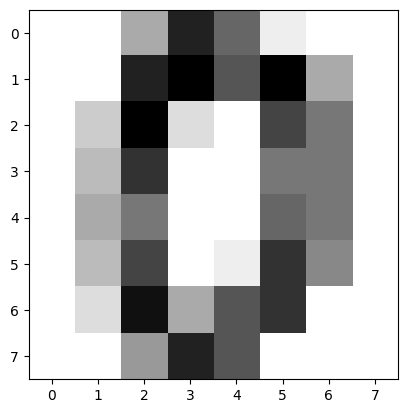

In [43]:
# 데이터 세트 읽어들이기
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

# 데이터 로드
digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [44]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# 훈련 데이터와 테스트 데이터
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

In [45]:
# numpy -> tensor 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [46]:
# 모델
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(64, 64)  # 입력 64차원, 출력 64차원
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)  # 10개의 숫자 분류

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = SimpleNN()

# 손실 함수와 최적화하기
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [50]:
# 학습
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [5/100], Loss: 0.2345
Epoch [10/100], Loss: 0.2073
Epoch [15/100], Loss: 0.1859
Epoch [20/100], Loss: 0.1688
Epoch [25/100], Loss: 0.1548
Epoch [30/100], Loss: 0.1429
Epoch [35/100], Loss: 0.1326
Epoch [40/100], Loss: 0.1237
Epoch [45/100], Loss: 0.1158
Epoch [50/100], Loss: 0.1088
Epoch [55/100], Loss: 0.1024
Epoch [60/100], Loss: 0.0966
Epoch [65/100], Loss: 0.0914
Epoch [70/100], Loss: 0.0865
Epoch [75/100], Loss: 0.0820
Epoch [80/100], Loss: 0.0779
Epoch [85/100], Loss: 0.0741
Epoch [90/100], Loss: 0.0705
Epoch [95/100], Loss: 0.0672
Epoch [100/100], Loss: 0.0640


In [51]:
# 예측
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)

In [52]:
# 정확도 계산
accuracy = metrics.accuracy_score(y_test.numpy(), predicted.numpy())
print('Accuracy:', accuracy)

Accuracy: 0.9861111111111112


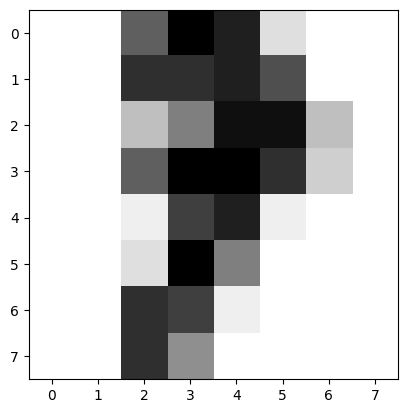

In [53]:
# 테스트 이미지 하나 보여주기
plt.imshow(X_test[10].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

In [54]:
# 예측 결과
model.eval()
with torch.no_grad():
    sample = X_test[10].unsqueeze(0)  # 배치 차원 추가
    output = model(sample)
    _, y_pred = torch.max(output, 1)
    print('예측 결과:', y_pred.item())  # 숫자 값만 출력

예측 결과: 7
